In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Load the dataset
data=pd.read_csv("Données bêta IzyLeaf/car_0.csv")
print (data.columns)

Index(['brand', 'model', 'dealer', 'url', 'price', 'year', 'km', 'fuel',
       'gearbox', 'color', 'doors', 'seats', 'fiscalPower', 'DINPower',
       'critAir', 'nb_img', 'link', 'id'],
      dtype='object')


In [3]:
# Select the clustering features
selected_columns = ['price', 'year', 'km', 'fiscalPower', 'DINPower']
X = data[selected_columns]

In [4]:
# Calculate the inertia for different numbers of clusters
inertias = []
k_values = range(1, 10) # Try different numbers of clusters from 1 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

/Users/elias/mambaforge/envs/sklearn-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elias/mambaforge/envs/sklearn-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elias/mambaforge/envs/sklearn-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elias/mambaforge/envs/sklearn-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

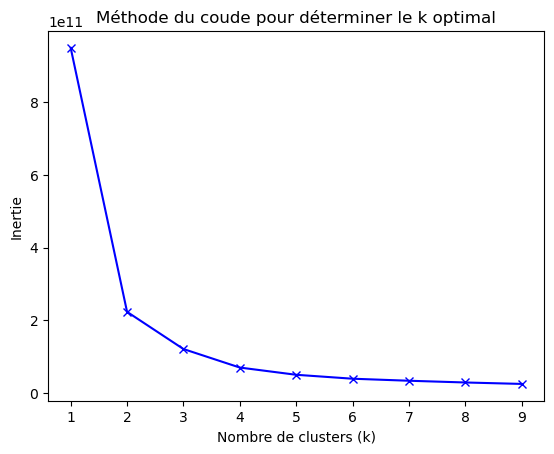

In [5]:
# Plot the inertia graph as a function of the number of clusters (elbow method) and find the optimal K
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel("Inertie")
plt.title("Méthode du coude pour déterminer le k optimal")
plt.show()

In [6]:
K=3 # In our case, using the elbow method, we find K=3

In [7]:
# Apply the K-means++ clustering algorithm
kmeans = KMeans(n_clusters=K,init='k-means++', random_state=42)
kmeans.fit(X)

/Users/elias/mambaforge/envs/sklearn-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [8]:
# Get the clustering predictions
cluster_labels = kmeans.predict(X)

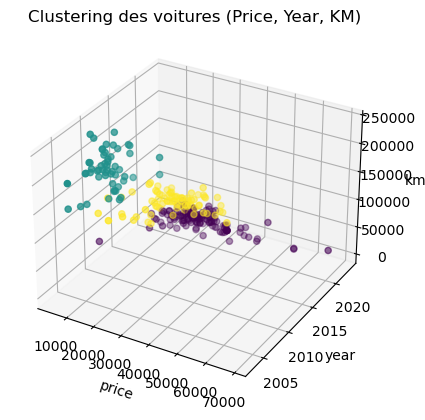

In [9]:
# Plot the clusters using 3 parameters (price, year, km)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X['price'], X['year'], X['km'], c=cluster_labels, cmap='viridis')
ax.set_xlabel('price')
ax.set_ylabel('year')
ax.set_zlabel('km')
ax.set_title('Clustering des voitures (Price, Year, KM)')
plt.show()